# Difference in OC scores based off of eligibility category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
eco = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('ECO with Exit21-22'))
elig = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('Elig Timeline Rpt 2018-2022'))

### Eco clean

In [3]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DISTRICT                              8633 non-null   object        
 1   CHILD_ID                              8632 non-null   float64       
 2   ECO_Entry_DATE                        5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                      5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                   5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE          5721 non-null   float64       
 6   ECO_Exit_DATE                         5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                     5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE                  5721 non-null   float64       
 9   Exit APPROPRIATE_ACTION_SCALE         5721 non-null   float64       
 10  

In [4]:
eco1 = eco[['CHILD_ID', 'OC1 - a','OC1 - b', 'OC1 - c', 'OC1 - d', 'OC1 - e',\
        'OC3 - a','OC3 - b', 'OC3 - c', 'OC3 - d', 'OC3 - e']]

In [5]:
eco1 = eco1.rename(columns={'CHILD_ID':'child_id'})

In [6]:
eco1['OC1 - a'].isnull().count()

8636

In [7]:
eco1 = eco1.dropna(subset=['OC1 - a','OC1 - b','OC1 - c','OC1 - d','OC1 - e',\
                           'OC3 - a','OC3 - b','OC3 - c','OC3 - d','OC3 - e'], how = 'all')

In [8]:
eco1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595 entries, 0 to 8630
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   child_id  5595 non-null   float64
 1   OC1 - a   20 non-null     float64
 2   OC1 - b   1441 non-null   float64
 3   OC1 - c   1414 non-null   float64
 4   OC1 - d   1842 non-null   float64
 5   OC1 - e   878 non-null    float64
 6   OC3 - a   14 non-null     float64
 7   OC3 - b   1430 non-null   float64
 8   OC3 - c   816 non-null    float64
 9   OC3 - d   1760 non-null   float64
 10  OC3 - e   1575 non-null   float64
dtypes: float64(11)
memory usage: 524.5 KB


#### Add new colums to calculate totals per score and avg score. Make sure it matches the excel numbers.

In [44]:

eco1['oc1b_score'] = eco1['OC1 - b'].count()
eco1['oc1b_avg'] = "{:0.2%}".format(eco1['OC1 - b'].count()/eco1['child_id'].count())
eco1['oc1c_score'] = eco1['OC1 - c'].count()
eco1['oc1c_avg'] = "{:0.2%}".format(eco1['OC1 - c'].count()/eco1['child_id'].count())
eco1['oc1d_score'] = eco1['OC1 - d'].count()
eco1['oc1d_avg'] = "{:0.2%}".format(eco1['OC1 - d'].count()/eco1['child_id'].count())
eco1['oc1e_score'] = eco1['OC1 - e'].count()
eco1['oc1e_avg'] = "{:0.2%}".format(eco1['OC1 - e'].count()/eco1['child_id'].count())

eco1['oc3a_score'] = eco1['OC3 - a'].count()
eco1['oc3a_avg'] = "{:0.2%}".format(eco1['OC3 - a'].count()/eco1['child_id'].count())
eco1['oc3b_score'] = eco1['OC3 - b'].count()
eco1['oc3b_avg'] = "{:0.2%}".format(eco1['OC3 - b'].count()/eco1['child_id'].count())
eco1['oc3c_score'] = eco1['OC3 - c'].count
eco1['oc3c_avg'] = "{:0.2%}".format(eco1['OC3 - c'].count()/eco1['child_id'].count())
eco1['oc3d_score'] = eco1['OC3 - d'].count()
eco1['oc3d_avg'] = "{:0.2%}".format(eco1['OC3 - d'].count()/eco1['child_id'].count())
eco1['oc3e_score'] = eco1['OC3 - e'].count()
eco1['oc3e_avg'] = "{:0.2%}".format(eco1['OC3 - e'].count()/eco1['child_id'].count())

In [10]:
eco_calc = eco1[['child_id','oc1a_score','oc1a_avg','oc1b_score','oc1b_avg','oc1c_score','oc1c_avg',\
                 'oc1d_score','oc1d_avg','oc1e_score','oc1e_avg','oc3a_score','oc3a_avg','oc3b_score','oc3b_avg',\
                 'oc3c_score','oc3c_avg','oc3d_score','oc3d_avg','oc3e_score','oc3e_avg']]
#eco_calc.info()
eco_calc.head(1)

,child_id,oc1a_score,oc1a_avg,oc1b_score,oc1b_avg,oc1c_score,oc1c_avg,oc1d_score,oc1d_avg,oc1e_score,...,oc3a_score,oc3a_avg,oc3b_score,oc3b_avg,oc3c_score,oc3c_avg,oc3d_score,oc3d_avg,oc3e_score,oc3e_avg
0,500335.0,20,0.36%,1441,25.76%,1414,25.27%,1842,32.92%,878,...,14,0.25%,1430,25.56%,<bound method Series.count of 0 NaN\n1 ...,14.58%,1760,31.46%,1575,28.15%


### Clean elig.

In [11]:
elig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [12]:
elig1 = elig[['Child ID', 'Init. Elig. Category']]

In [13]:
elig1 = elig1.rename(columns={'Child ID':'child_id', 'Init. Elig. Category':'int_cat'})
elig1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   child_id  67610 non-null  int64 
 1   int_cat   38290 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


##### Merge

In [14]:
elig1.info()
eco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   child_id  67610 non-null  int64 
 1   int_cat   38290 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595 entries, 0 to 8630
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_id    5595 non-null   float64
 1   OC1 - a     20 non-null     float64
 2   OC1 - b     1441 non-null   float64
 3   OC1 - c     1414 non-null   float64
 4   OC1 - d     1842 non-null   float64
 5   OC1 - e     878 non-null    float64
 6   OC3 - a     14 non-null     float64
 7   OC3 - b     1430 non-null   float64
 8   OC3 - c     816 non-null    float64
 9   OC3 - d     1760 non-null   float64
 10  OC3 - e     1575 non-null   float64
 11  oc1a_score  5595 non-null   int64  
 12  oc1a

In [15]:
elig_eco = pd.merge(elig1, eco1, how='inner', on='child_id')

In [16]:
elig_eco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595 entries, 0 to 5594
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_id    5595 non-null   int64  
 1   int_cat     5594 non-null   object 
 2   OC1 - a     20 non-null     float64
 3   OC1 - b     1441 non-null   float64
 4   OC1 - c     1414 non-null   float64
 5   OC1 - d     1842 non-null   float64
 6   OC1 - e     878 non-null    float64
 7   OC3 - a     14 non-null     float64
 8   OC3 - b     1430 non-null   float64
 9   OC3 - c     816 non-null    float64
 10  OC3 - d     1760 non-null   float64
 11  OC3 - e     1575 non-null   float64
 12  oc1a_score  5595 non-null   int64  
 13  oc1a_avg    5595 non-null   object 
 14  oc1b_score  5595 non-null   int64  
 15  oc1b_avg    5595 non-null   object 
 16  oc1c_score  5595 non-null   int64  
 17  oc1c_avg    5595 non-null   object 
 18  oc1d_score  5595 non-null   int64  
 19  oc1d_avg    5595 non-null  

In [17]:
elig_eco_avg = elig_eco.iloc[:,[1,13,15,17,19,21,23,25,27,29,31]]
elig_eco_avg

,int_cat,oc1a_avg,oc1b_avg,oc1c_avg,oc1d_avg,oc1e_avg,oc3a_avg,oc3b_avg,oc3c_avg,oc3d_avg,oc3e_avg
0,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
1,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
2,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
3,Diagnosed Condition,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
4,Diagnosed Condition,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
...,...,...,...,...,...,...,...,...,...,...,...
5590,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5591,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5592,"Diagnosed Condition, Developmental Evaluation",0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5593,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%


In [18]:
elig_eco1 = elig_eco.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

In [19]:
elig_eco1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595 entries, 0 to 5594
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   int_cat  5594 non-null   object 
 1   OC1 - a  20 non-null     float64
 2   OC1 - b  1441 non-null   float64
 3   OC1 - c  1414 non-null   float64
 4   OC1 - d  1842 non-null   float64
 5   OC1 - e  878 non-null    float64
 6   OC3 - a  14 non-null     float64
 7   OC3 - b  1430 non-null   float64
 8   OC3 - c  816 non-null    float64
 9   OC3 - d  1760 non-null   float64
 10  OC3 - e  1575 non-null   float64
dtypes: float64(10), object(1)
memory usage: 524.5+ KB


In [20]:
elig_eco1.head(20)

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,Diagnosed Condition,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
5,"Diagnosed Condition, Developmental Evaluation",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,"Diagnosed Condition, Developmental Evaluation",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
7,Diagnosed Condition,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,Developmental Evaluation,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


### Group By int_cat 

In [21]:
#elig_eco2 = elig_eco1.groupby('int_cat')
#
elig_eco2 = elig_eco1.groupby(by='int_cat',as_index=False, sort=True, dropna=False).sum()

In [22]:
elig_eco2.head(20)

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,15.0,1017.0,1035.0,1257.0,750.0,9.0,1023.0,527.0,1160.0,1355.0
1,Diagnosed Condition,4.0,170.0,165.0,268.0,59.0,2.0,163.0,106.0,292.0,103.0
2,"Diagnosed Condition, Developmental Evaluation",1.0,254.0,214.0,317.0,68.0,3.0,244.0,183.0,308.0,116.0
3,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### FacetGrid

In [23]:
elig_eco_avg

,int_cat,oc1a_avg,oc1b_avg,oc1c_avg,oc1d_avg,oc1e_avg,oc3a_avg,oc3b_avg,oc3c_avg,oc3d_avg,oc3e_avg
0,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
1,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
2,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
3,Diagnosed Condition,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
4,Diagnosed Condition,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
...,...,...,...,...,...,...,...,...,...,...,...
5590,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5591,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5592,"Diagnosed Condition, Developmental Evaluation",0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%
5593,Developmental Evaluation,0.36%,25.76%,25.27%,32.92%,15.69%,0.25%,25.56%,14.58%,31.46%,28.15%


In [24]:
elig_eco2 = elig_eco1.groupby(by='int_cat',as_index=False, sort=True, dropna=False).sum()

In [25]:
dev_ev = elig_eco1[elig_eco1['int_cat'] == 'Developmental Evaluation']

In [26]:
dev_ev

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
8,Developmental Evaluation,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
14,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5589,Developmental Evaluation,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5590,Developmental Evaluation,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5591,Developmental Evaluation,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5593,Developmental Evaluation,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [27]:
dev_ev_group = dev_ev.groupby(['int_cat'])
# n_by_state_gender = df.groupby(["state", "gender"])["last_name"].count()

In [28]:
dev_ev_group.head(10)

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
8,Developmental Evaluation,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
14,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
15,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
16,Developmental Evaluation,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
31,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
35,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
37,Developmental Evaluation,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [29]:
dev_co = elig_eco1[elig_eco1['int_cat'] == 'Diagnosed Condition']

In [30]:
dev_co

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
3,Diagnosed Condition,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
7,Diagnosed Condition,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
12,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5535,Diagnosed Condition,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
5537,Diagnosed Condition,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5543,Diagnosed Condition,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
5566,Diagnosed Condition,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [31]:
both1 = elig_eco1[elig_eco1['int_cat'] == 'Diagnosed Condition, Developmental Evaluation']

In [32]:
elig_eco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   int_cat  3 non-null      object 
 1   OC1 - a  4 non-null      float64
 2   OC1 - b  4 non-null      float64
 3   OC1 - c  4 non-null      float64
 4   OC1 - d  4 non-null      float64
 5   OC1 - e  4 non-null      float64
 6   OC3 - a  4 non-null      float64
 7   OC3 - b  4 non-null      float64
 8   OC3 - c  4 non-null      float64
 9   OC3 - d  4 non-null      float64
 10  OC3 - e  4 non-null      float64
dtypes: float64(10), object(1)
memory usage: 480.0+ bytes


<AxesSubplot:xlabel='int_cat'>

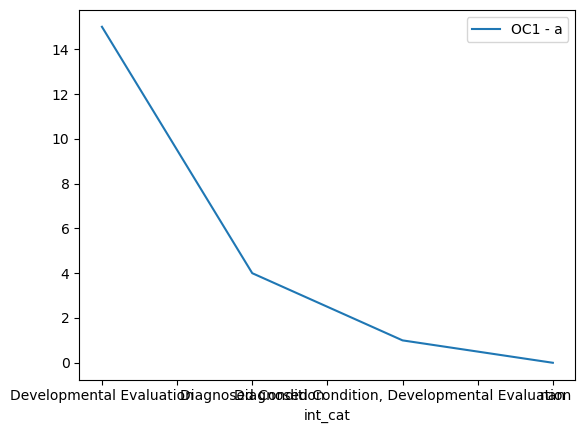

In [33]:
elig_eco2.plot.line(x='int_cat', y = 'OC1 - a')

In [34]:
elig_eco_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595 entries, 0 to 5594
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   int_cat   5594 non-null   object
 1   oc1a_avg  5595 non-null   object
 2   oc1b_avg  5595 non-null   object
 3   oc1c_avg  5595 non-null   object
 4   oc1d_avg  5595 non-null   object
 5   oc1e_avg  5595 non-null   object
 6   oc3a_avg  5595 non-null   object
 7   oc3b_avg  5595 non-null   object
 8   oc3c_avg  5595 non-null   object
 9   oc3d_avg  5595 non-null   object
 10  oc3e_avg  5595 non-null   object
dtypes: object(11)
memory usage: 524.5+ KB


In [35]:
elig_eco2.info()
elig_eco2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   int_cat  3 non-null      object 
 1   OC1 - a  4 non-null      float64
 2   OC1 - b  4 non-null      float64
 3   OC1 - c  4 non-null      float64
 4   OC1 - d  4 non-null      float64
 5   OC1 - e  4 non-null      float64
 6   OC3 - a  4 non-null      float64
 7   OC3 - b  4 non-null      float64
 8   OC3 - c  4 non-null      float64
 9   OC3 - d  4 non-null      float64
 10  OC3 - e  4 non-null      float64
dtypes: float64(10), object(1)
memory usage: 480.0+ bytes


,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,15.0,1017.0,1035.0,1257.0,750.0,9.0,1023.0,527.0,1160.0,1355.0
1,Diagnosed Condition,4.0,170.0,165.0,268.0,59.0,2.0,163.0,106.0,292.0,103.0
2,"Diagnosed Condition, Developmental Evaluation",1.0,254.0,214.0,317.0,68.0,3.0,244.0,183.0,308.0,116.0
3,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
de = elig_eco2[elig_eco2['int_cat'] == 'Developmental Evaluation']
# above_35 = titanic[titanic["Age"] > 35]

In [37]:
de

,int_cat,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e
0,Developmental Evaluation,15.0,1017.0,1035.0,1257.0,750.0,9.0,1023.0,527.0,1160.0,1355.0


<AxesSubplot:>

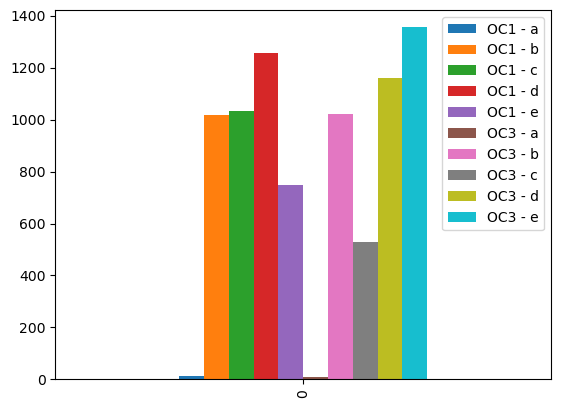

In [38]:
de.plot.bar()

C:\Users\jhank\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


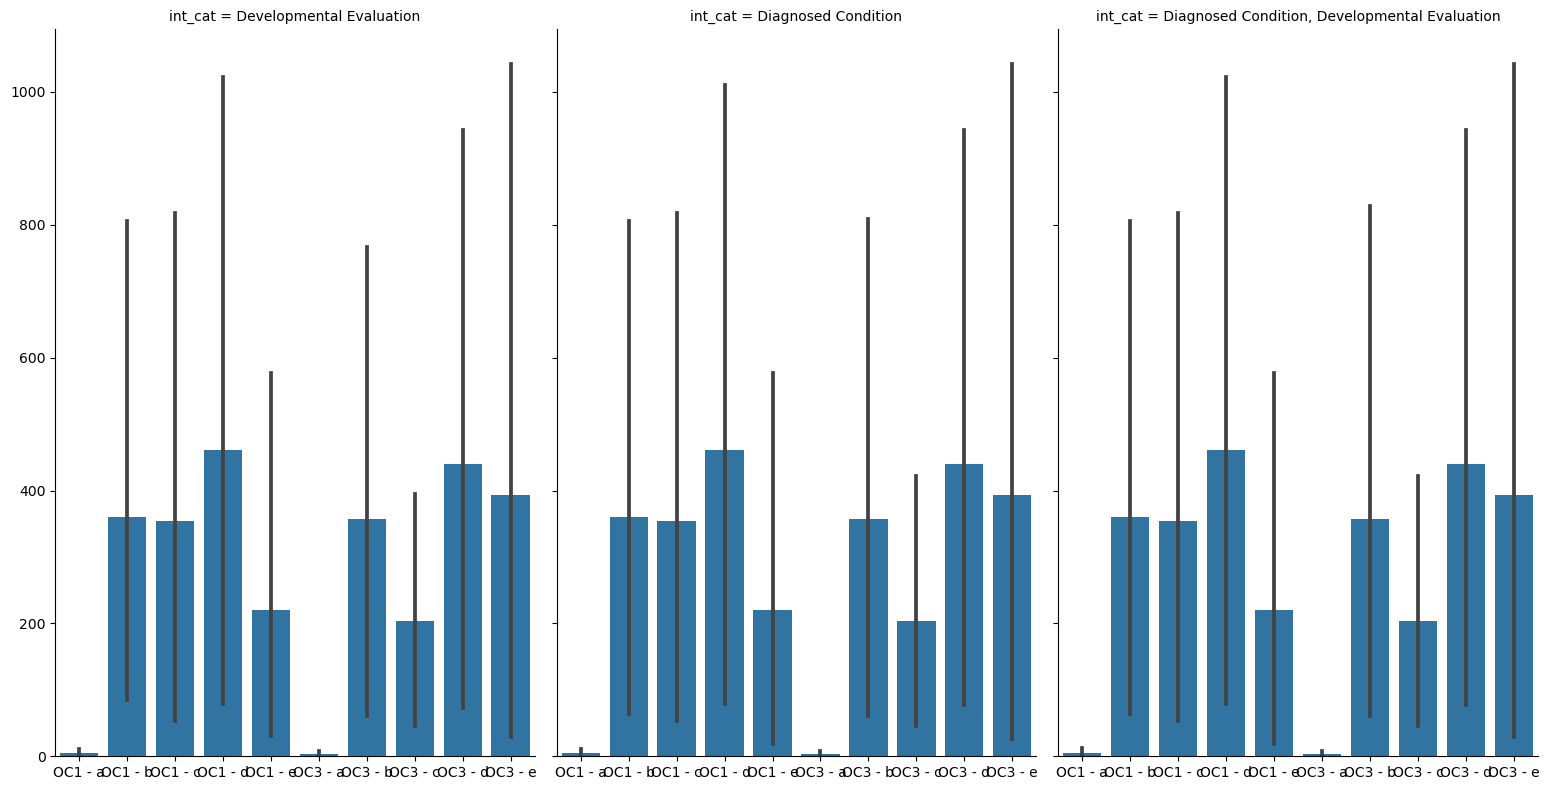

In [39]:
g = sns.FacetGrid(elig_eco2, col = 'int_cat', height = 8, aspect = .65)
g = g.map(sns.barplot, data = elig_eco2)

In [40]:
elig_eco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   int_cat  3 non-null      object 
 1   OC1 - a  4 non-null      float64
 2   OC1 - b  4 non-null      float64
 3   OC1 - c  4 non-null      float64
 4   OC1 - d  4 non-null      float64
 5   OC1 - e  4 non-null      float64
 6   OC3 - a  4 non-null      float64
 7   OC3 - b  4 non-null      float64
 8   OC3 - c  4 non-null      float64
 9   OC3 - d  4 non-null      float64
 10  OC3 - e  4 non-null      float64
dtypes: float64(10), object(1)
memory usage: 480.0+ bytes


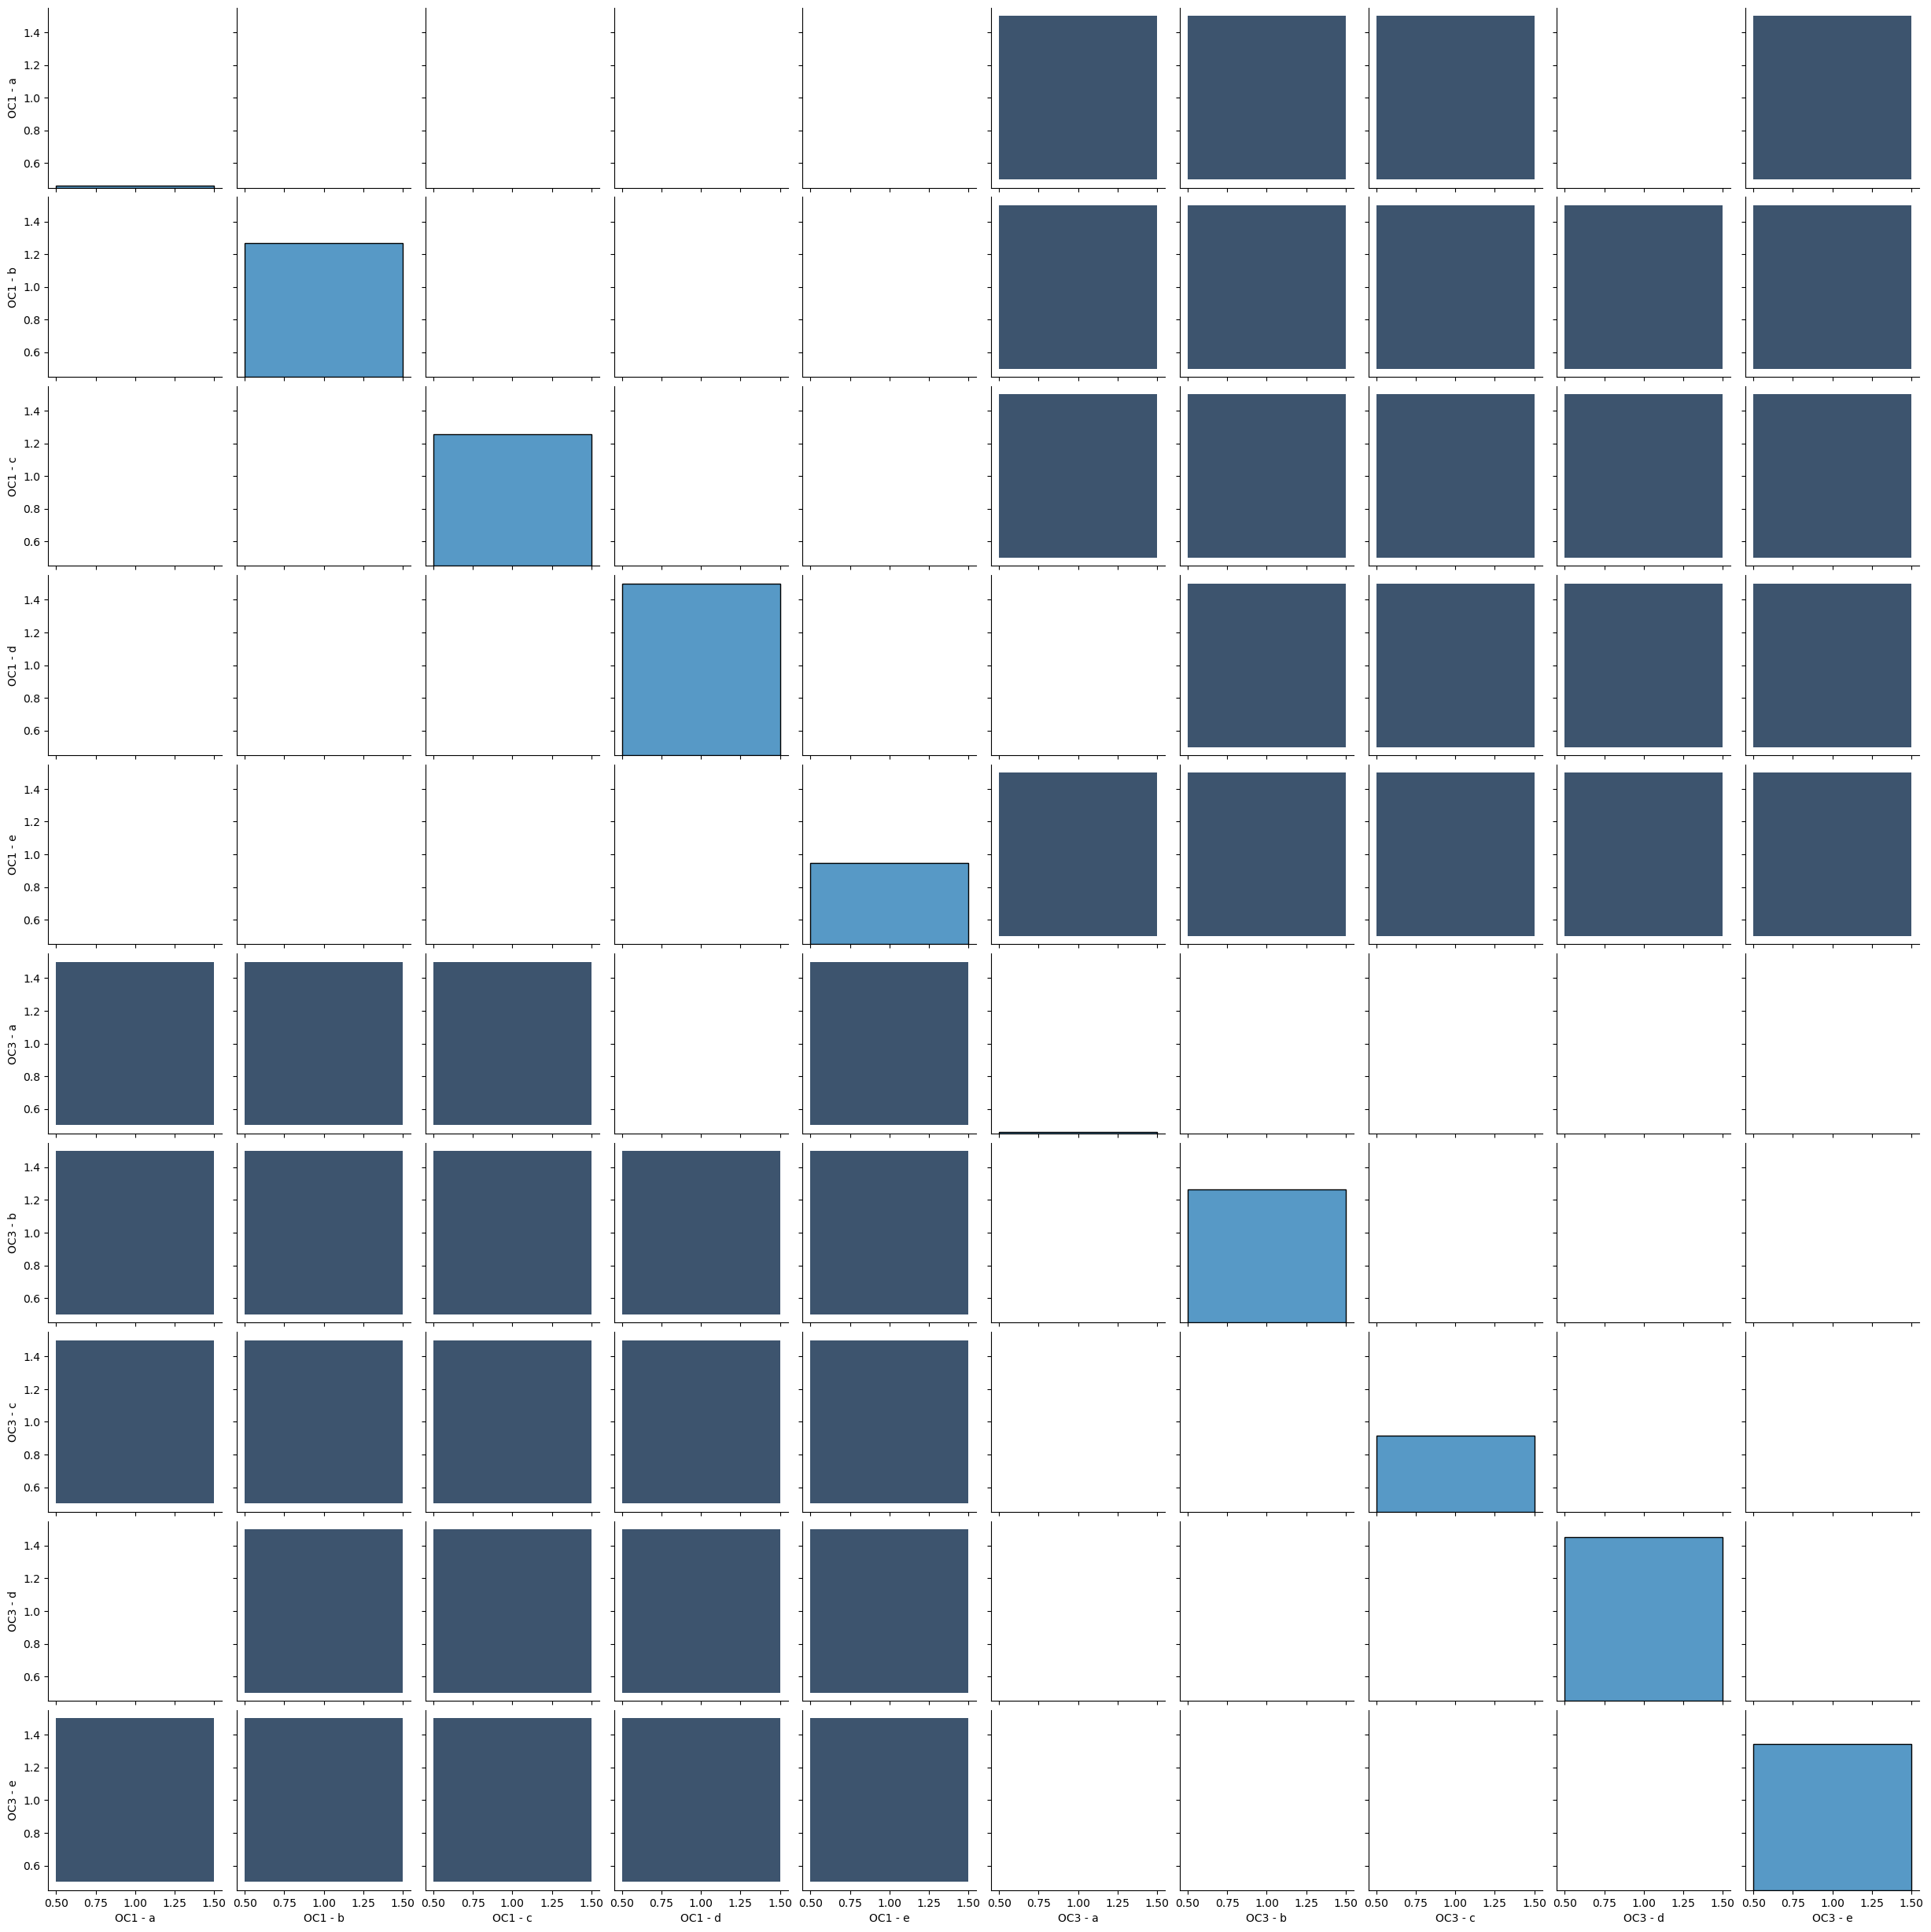

In [41]:
sns.pairplot(elig_eco1, kind = 'hist')

<AxesSubplot:xlabel='int_cat'>

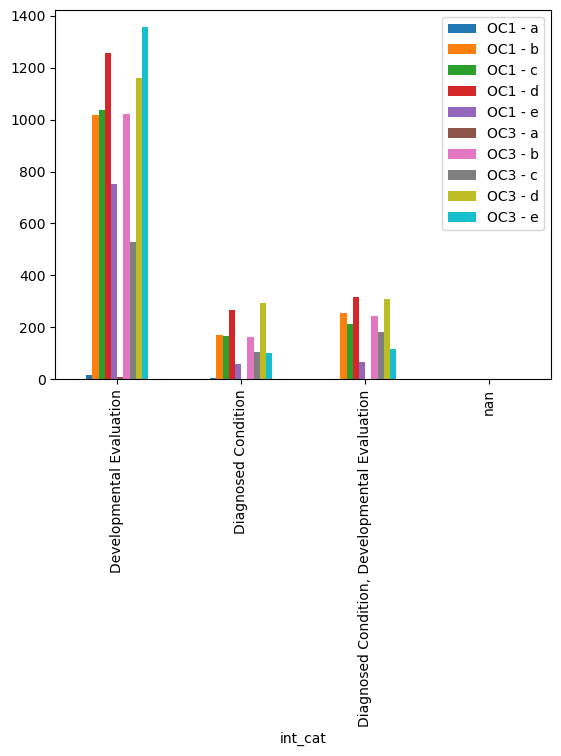

In [42]:
elig_eco2.plot.bar(x = 'int_cat')

In [43]:
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="int_cat", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

NameError: name 'df' is not defined